In [1]:
import pandas as pd
x=[1,2,3,4,5,6,7]
y=[2,3,4,5,6,7,8]

d = {"x":x,"y":y}
df = pd.DataFrame(d)
df

,x,y
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
5,6,7
6,7,8


In [2]:
import numpy as np
df2 = df.copy()
df2["y"]=np.ones(len(df))
df

,x,y
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
5,6,7
6,7,8


In [3]:
X = np.array(df2)
X

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.]])

In [4]:
Xt = X.T
Xt

array([[1., 2., 3., 4., 5., 6., 7.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [5]:
M=Xt@X
M

array([[140.,  28.],
       [ 28.,   7.]])

In [6]:
y = np.array(df[["y"]])
y

array([[2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [7]:
detM = np.linalg.det(M)
detM

np.float64(195.99999999999991)

In [8]:
inversa = np.linalg.inv(M)
inversa

array([[ 0.03571429, -0.14285714],
       [-0.14285714,  0.71428571]])

In [9]:
pinversa = np.linalg.pinv(M)
pinversa

array([[ 0.03571429, -0.14285714],
       [-0.14285714,  0.71428571]])

In [10]:
betas = inversa @ Xt @ y
betas

array([[1.],
       [1.]])

Metodo mas rapdio

In [11]:
import pandas as pd
x = [1,2,2,3,4,4,5,6]
y = [2,3,4,4,4,6,5,7]

d = {"x":x, "y":y}
df = pd.DataFrame(d)
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [12]:
df2=df.copy()
df2["y"]=np.ones(len(df))
df2

,x,y
0,1,1.0
1,2,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,4,1.0
6,5,1.0
7,6,1.0


In [13]:
X=np.array(df2)
X.shape

(8, 2)

In [14]:
Xpinv= np.linalg.pinv(X)
Xpinv.shape

(2, 8)

In [15]:
y = np.array(df[["y"]])
y.shape

(8, 1)

In [16]:
betas = Xpinv @ y
print(betas.shape)
betas

(2, 1)


array([[0.8490566 ],
       [1.50943396]])

In [17]:
#Calculo de errores manualmente
df["ypred"] = X @ betas
df

,x,y,ypred
0,1,2,2.358491
1,2,3,3.207547
2,2,4,3.207547
3,3,4,4.056604
4,4,4,4.905660
5,4,6,4.905660
6,5,5,5.754717
7,6,7,6.603774


In [18]:
# error = y - ypred
df["y-ypred"] =  df["y"] - df["ypred"]
df

,x,y,ypred,y-ypred
0,1,2,2.358491,-0.358491
1,2,3,3.207547,-0.207547
2,2,4,3.207547,0.792453
3,3,4,4.056604,-0.056604
4,4,4,4.905660,-0.905660
5,4,6,4.905660,1.094340
6,5,5,5.754717,-0.754717
7,6,7,6.603774,0.396226


In [19]:
# error = y - ypred
df["error^2"] = df["y-ypred"]**2
df

,x,y,ypred,y-ypred,error^2
0,1,2,2.358491,-0.358491,0.128515
1,2,3,3.207547,-0.207547,0.043076
2,2,4,3.207547,0.792453,0.627981
3,3,4,4.056604,-0.056604,0.003204
4,4,4,4.905660,-0.905660,0.820221
5,4,6,4.905660,1.094340,1.197579
6,5,5,5.754717,-0.754717,0.569598
7,6,7,6.603774,0.396226,0.156995


In [20]:
error_cuad_total = df["error^2"].sum()
error_cuad_total

np.float64(3.5471698113207553)

In [21]:
# MSE = error_cuad_medio
mse = error_cuad_total / len(df)
mse

np.float64(0.4433962264150944)

In [22]:
rmse = mse**(1/2)
rmse

np.float64(0.6658800390574074)

<Axes: >

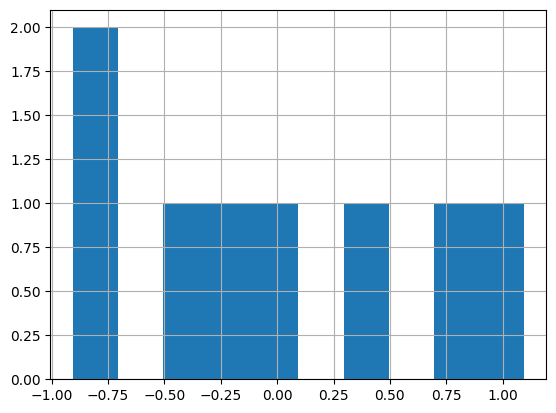

In [23]:
#histograma de errores
df["y-ypred"].hist()

Actividad de consulta práctica:
Calcular el error absoluto total y el MAE (error absoluto medio). Ayuda: usar el df y extenderlo como se hizo para el cuadratico.

MAPE

Otras métricas: R2, entre otras.

*Recuerden:

Replicar lo anterior en cada dataset (el del video de youtube, el de las ventas y reg mutiple del link donde está la formula del OLS, y si alcanzan pueden ir replicando en su datset del caso de estudio)

In [24]:
df["abs(error)"] = abs(df["y-ypred"])
df

,x,y,ypred,y-ypred,error^2,abs(error)
0,1,2,2.358491,-0.358491,0.128515,0.358491
1,2,3,3.207547,-0.207547,0.043076,0.207547
2,2,4,3.207547,0.792453,0.627981,0.792453
3,3,4,4.056604,-0.056604,0.003204,0.056604
4,4,4,4.905660,-0.905660,0.820221,0.905660
5,4,6,4.905660,1.094340,1.197579,1.094340
6,5,5,5.754717,-0.754717,0.569598,0.754717
7,6,7,6.603774,0.396226,0.156995,0.396226


In [25]:
total_absolute_error = df["abs(error)"].sum()
mae = total_absolute_error / len(df)
print(f"Total Absolute Error: {total_absolute_error}")
print(f"Mean Absolute Error (MAE): {mae}")

Total Absolute Error: 4.56603773584906
Mean Absolute Error (MAE): 0.5707547169811324


In [26]:
df['abs(error)%'] = df['abs(error)'] / df['y'] * 100
df

,x,y,ypred,y-ypred,error^2,abs(error),abs(error)%
0,1,2,2.358491,-0.358491,0.128515,0.358491,17.924528
1,2,3,3.207547,-0.207547,0.043076,0.207547,6.918239
2,2,4,3.207547,0.792453,0.627981,0.792453,19.811321
3,3,4,4.056604,-0.056604,0.003204,0.056604,1.415094
4,4,4,4.905660,-0.905660,0.820221,0.905660,22.641509
5,4,6,4.905660,1.094340,1.197579,1.094340,18.238994
6,5,5,5.754717,-0.754717,0.569598,0.754717,15.094340
7,6,7,6.603774,0.396226,0.156995,0.396226,5.660377


In [27]:
#Mape
mape = df[df['y'] != 0]['abs(error)%'].mean()
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): 13.463050314465423%


In [28]:
y_mean = df['y'].mean()
sst = ((df['y'] - y_mean)**2).sum()
r2 = 1 - (error_cuad_total / sst)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.8015569336324053


#Calculo de errores manualmente

In [29]:
df["ypred"] = X @ betas
df

,x,y,ypred,y-ypred,error^2,abs(error),abs(error)%
0,1,2,2.358491,-0.358491,0.128515,0.358491,17.924528
1,2,3,3.207547,-0.207547,0.043076,0.207547,6.918239
2,2,4,3.207547,0.792453,0.627981,0.792453,19.811321
3,3,4,4.056604,-0.056604,0.003204,0.056604,1.415094
4,4,4,4.905660,-0.905660,0.820221,0.905660,22.641509
5,4,6,4.905660,1.094340,1.197579,1.094340,18.238994
6,5,5,5.754717,-0.754717,0.569598,0.754717,15.094340
7,6,7,6.603774,0.396226,0.156995,0.396226,5.660377


In [30]:
df["y-ypred"] =  df["y"] - df["ypred"]
df

,x,y,ypred,y-ypred,error^2,abs(error),abs(error)%
0,1,2,2.358491,-0.358491,0.128515,0.358491,17.924528
1,2,3,3.207547,-0.207547,0.043076,0.207547,6.918239
2,2,4,3.207547,0.792453,0.627981,0.792453,19.811321
3,3,4,4.056604,-0.056604,0.003204,0.056604,1.415094
4,4,4,4.905660,-0.905660,0.820221,0.905660,22.641509
5,4,6,4.905660,1.094340,1.197579,1.094340,18.238994
6,5,5,5.754717,-0.754717,0.569598,0.754717,15.094340
7,6,7,6.603774,0.396226,0.156995,0.396226,5.660377


In [31]:
# error = y-ypred
df["error^2"] = df["y-ypred"]**2
df

,x,y,ypred,y-ypred,error^2,abs(error),abs(error)%
0,1,2,2.358491,-0.358491,0.128515,0.358491,17.924528
1,2,3,3.207547,-0.207547,0.043076,0.207547,6.918239
2,2,4,3.207547,0.792453,0.627981,0.792453,19.811321
3,3,4,4.056604,-0.056604,0.003204,0.056604,1.415094
4,4,4,4.905660,-0.905660,0.820221,0.905660,22.641509
5,4,6,4.905660,1.094340,1.197579,1.094340,18.238994
6,5,5,5.754717,-0.754717,0.569598,0.754717,15.094340
7,6,7,6.603774,0.396226,0.156995,0.396226,5.660377


In [32]:
error_cuad_total = df["error^2"].sum()
error_cuad_total

np.float64(3.5471698113207553)

In [34]:
#MSE == error caudratico medio
mse = error_cuad_total / len(df)
mse

np.float64(0.4433962264150944)

In [35]:
rmse = mse**(1/2)
rmse

np.float64(0.6658800390574074)

<Axes: >

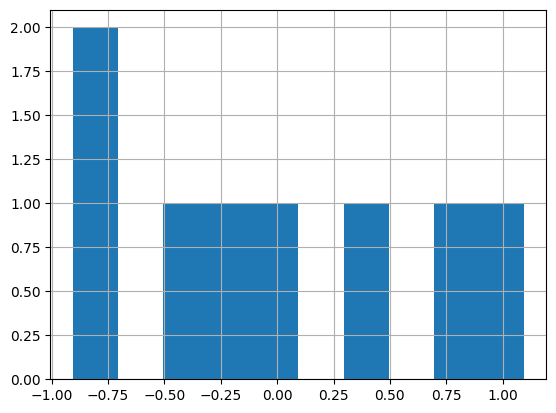

In [36]:
#Histograma de errores
df["y-ypred"].hist()